In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd. read_csv('insurance_claims_cleaned_fixed.csv')

In [2]:
df.groupby('incident_type')['fraud_reported'].value_counts()

incident_type             fraud_reported
Multi-vehicle Collision   No                305
                          Yes               114
Parked Car                No                 76
                          Yes                 8
Single Vehicle Collision  No                286
                          Yes               117
Vehicle Theft             No                 86
                          Yes                 8
Name: count, dtype: int64

In [3]:
df.groupby('incident_type')['fraud_reported'].value_counts(normalize = True)


incident_type             fraud_reported
Multi-vehicle Collision   No                0.727924
                          Yes               0.272076
Parked Car                No                0.904762
                          Yes               0.095238
Single Vehicle Collision  No                0.709677
                          Yes               0.290323
Vehicle Theft             No                0.914894
                          Yes               0.085106
Name: proportion, dtype: float64

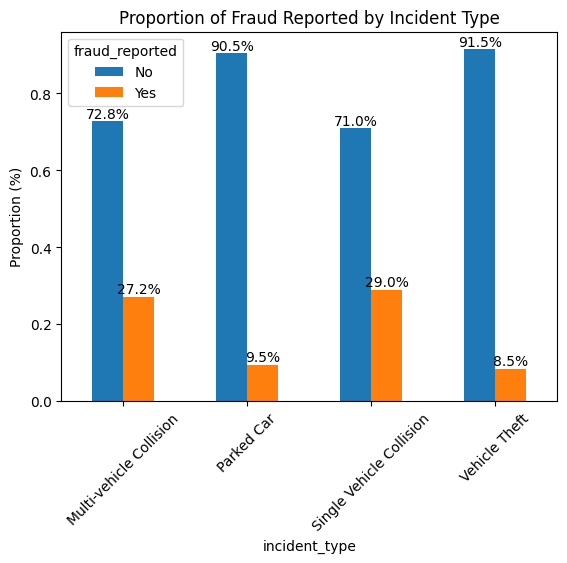

In [4]:
# Visualize proportion of fraud reported by incident type
proportions = df.groupby('incident_type')['fraud_reported'].value_counts(normalize=True).unstack()
ax = proportions.plot(kind='bar', stacked=False)

# Annotate each bar with percentage
for p in ax.patches:
    height = p.get_height()
    percent = f'{height*100:.1f}%'
    ax.annotate(percent, (p.get_x() + p.get_width()/2, height), ha='center', va='bottom')

plt.ylabel('Proportion (%)')
plt.title('Proportion of Fraud Reported by Incident Type')
plt.xticks(rotation=45)
plt.show()

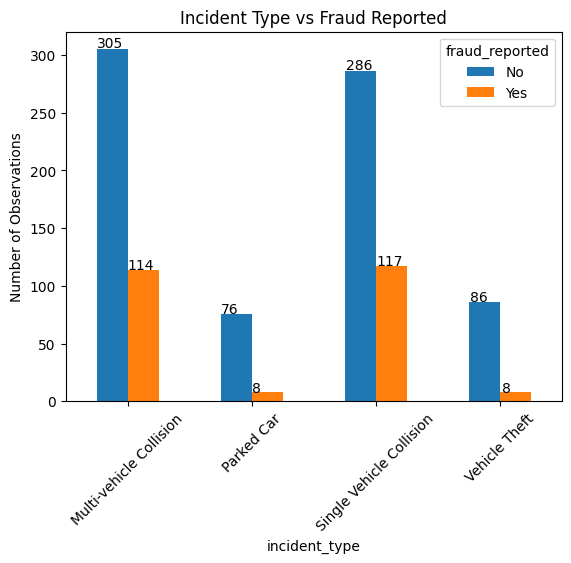

In [5]:
#lets visualize collision type vs fraud reported
ax = df.groupby('incident_type')['fraud_reported'].value_counts().unstack().plot(kind = 'bar', stacked = False)
#add number of observations on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() * 1.005, p.get_height() * 1.005))

plt.ylabel('Number of Observations')
plt.title('Incident Type vs Fraud Reported')

plt.xticks(rotation=45)
plt.show()

Multi-vehicle Collision: 27.2% fraud rate

Single Vehicle Collision: 29.0% fraud rate


Key insights:

Collisions (especially single vehicle) have much higher fraud rates.
Parked car and vehicle theft claims are much less likely to be fraudulent.

Explore incident_severity and collision_type for similar patterns.
Visualize these rates (bar plot) for clearer comparison.

In [6]:
#Now lets take a look at incident severity, to see how they affect fraud reported
df.groupby('incident_severity')['fraud_reported'].value_counts(normalize=True)

incident_severity  fraud_reported
Major Damage       Yes               0.605072
                   No                0.394928
Minor Damage       No                0.892655
                   Yes               0.107345
Total Loss         No                0.871429
                   Yes               0.128571
Trivial Damage     No                0.933333
                   Yes               0.066667
Name: proportion, dtype: float64

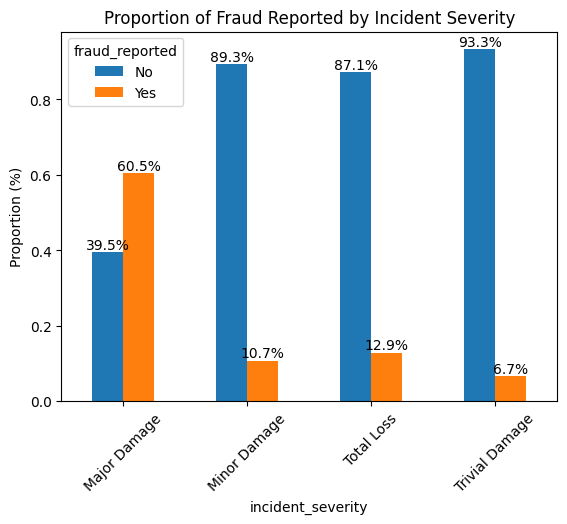

In [7]:
# Visualize proportion of fraud reported by incident severity
proportions = df.groupby('incident_severity')['fraud_reported'].value_counts(normalize=True).unstack()
ax = proportions.plot(kind='bar', stacked=False)

# Annotate each bar with percentage
for p in ax.patches:
    height = p.get_height()
    percent = f'{height*100:.1f}%'
    ax.annotate(percent, (p.get_x() + p.get_width()/2, height), ha='center', va='bottom')

plt.ylabel('Proportion (%)')
plt.title('Proportion of Fraud Reported by Incident Severity')
plt.xticks(rotation=45)
plt.show()

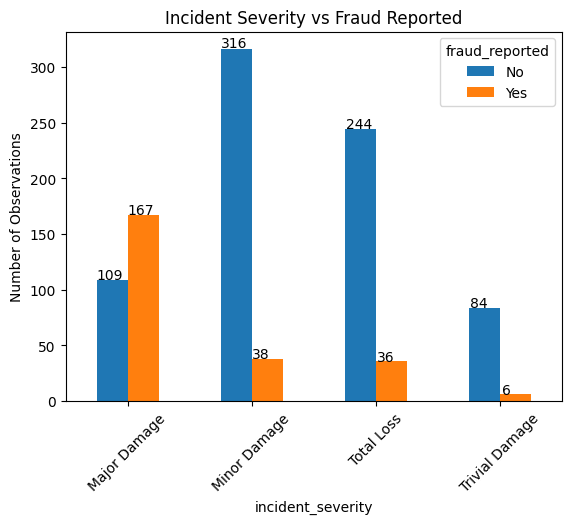

In [8]:
#lets visualize collision type vs fraud reported
ax = df.groupby('incident_severity')['fraud_reported'].value_counts().unstack().plot(kind = 'bar', stacked = False)
#add number of observations on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() * 1.005, p.get_height() * 1.005))

plt.ylabel('Number of Observations')
plt.title('Incident Severity vs Fraud Reported')

plt.xticks(rotation=45)
plt.show()